<a href="https://colab.research.google.com/github/muthumeenal12/PRODIGY_ML_02/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK-02**
*Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.*

In [2]:
!git clone https://github.com/muthumeenal12/PRODIGY_ML_02.git

Cloning into 'PRODIGY_ML_02'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), done.


In [3]:
%cd PRODIGY_ML_02

/content/PRODIGY_ML_02


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings

In [12]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [13]:
data.duplicated().sum()

0

#ELBOW METHOD:

The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). *The optimal K value is the point at which the graph forms an elbow.*

<ipython-input-40-0acf1001e922>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)


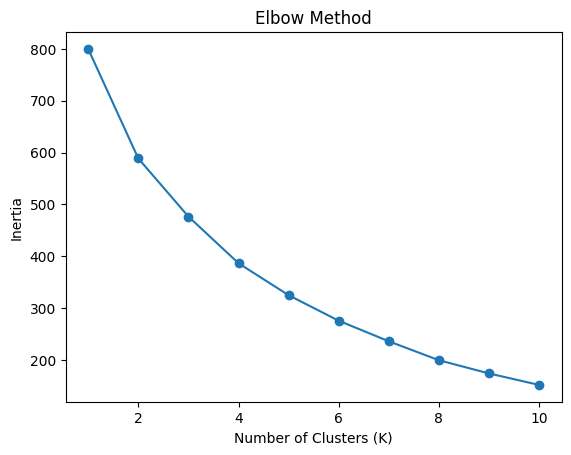

In [40]:
warnings.simplefilter(action='ignore', category=FutureWarning)

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
X['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
def elbow_method(X, max_k):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia

# Example usage
X = X_scaled  # Your data
max_k = 10  # Maximum number of clusters to consider

# Calculate inertia for different K values
inertia_values = elbow_method(X, max_k)

# Plot the elbow curve
plt.plot(range(1, max_k + 1), inertia_values, marker='o');
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show();


In [41]:
inertia_values

[800.0,
 588.8026767824938,
 476.78755441351586,
 386.7147857740687,
 325.10998348953433,
 275.8588431130499,
 236.20494707086885,
 199.71662559667672,
 174.19309570857683,
 152.0867629871069]

Here, the elbow formation is not quite clear.

#SILHOUETTE SCORE

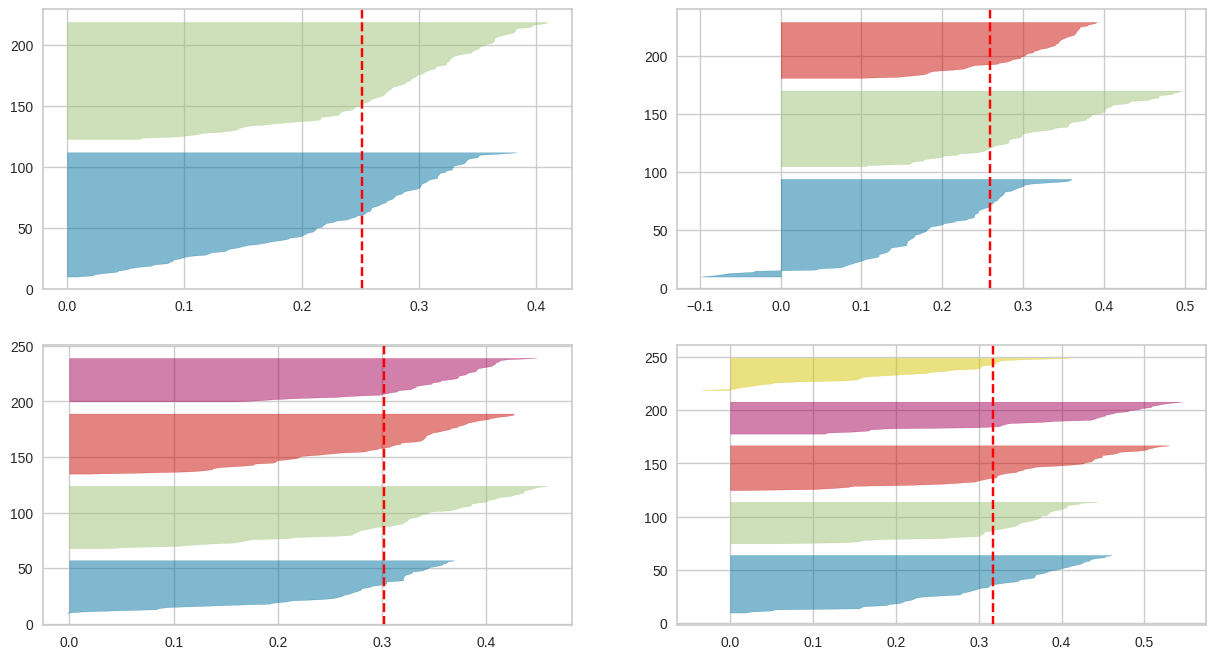

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)


From the above graph, we can find that k can be either 2 or 4.

- the clusters should cross the mean Silhouette Score (Red Line)
- Each group should be equal or approximately equal in size.

#K MEANS CLUSTERING

In [65]:
dfa = data[['Age','Annual Income (k$)']]
print('Total Row : ', len(dfa))

Total Row :  200


In [23]:
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

In [63]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(dfa_std)
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels

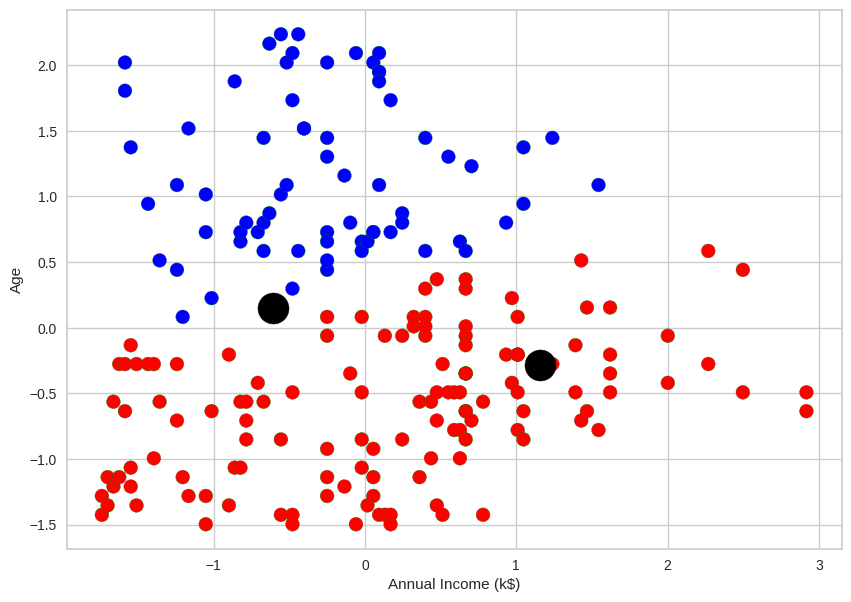

In [64]:
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0],
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1],
            color = "red", s=100, edgecolor='green',linestyle='--')
#plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2], color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()

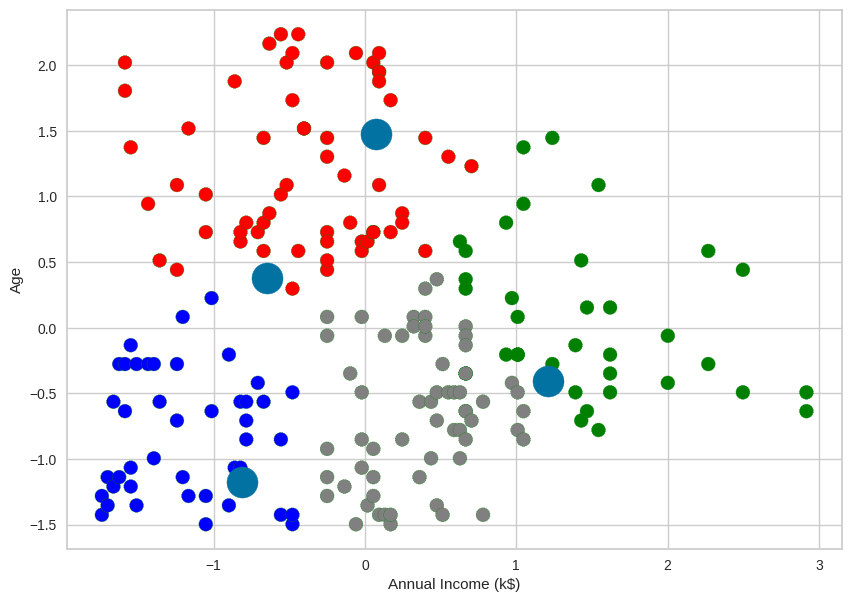

In [61]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(dfa_std)
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0],
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1],
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2],
            color = "green", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 3], new_dfa["Age"][new_dfa["label_kmeans"] == 3],
            color = "gray", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=500);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()